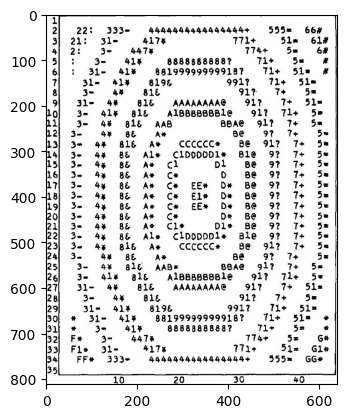

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("./input/fig.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(image)
plt.show()

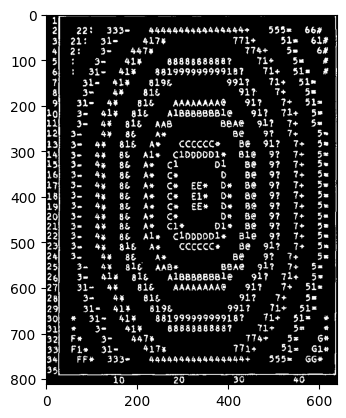

In [27]:
# Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
# Applying binary inverse threshold
ret, gray_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)  

plt.imshow(gray_image, cmap='gray') # Specify grayscale colormap
plt.show()

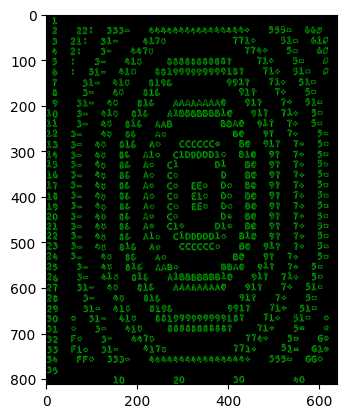

In [28]:
# Detecting contours in the thresholded grayscale image using hierarchy retrieval and simple approximation
contours, _ = cv2.findContours(gray_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Organizing the found contours by their size in descending order and discarding the two largest ones i.e. the outer frames
contours = sorted(contours, key=cv2.contourArea, reverse=True)[2:]

# Creating a blank image with the same dimensions as the original to serve as a canvas
draw_blank_image = np.zeros_like(image)

# Illustrating the contours on the blank canvas using green color and a line thickness of 1
result = cv2.drawContours(draw_blank_image, contours, -1, (0, 255, 0), 1)

plt.imshow(result)
plt.show()


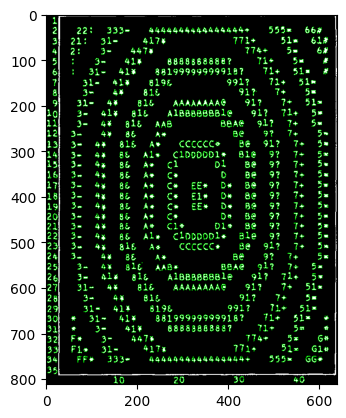

In [29]:
# Convert grayscale image to BGR format for color inversion
inverted_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR) 
# Drawing contours onto inverted BGR image
result = cv2.drawContours(inverted_image.copy(), contours, -1, (0, 255, 0), 1) 

plt.imshow(result)
plt.show()

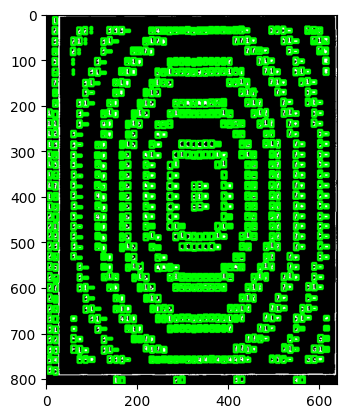

In [30]:
# Calculate bounding boxes for all contours
bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

# Create a copy of the inverted image to draw on
background_for_drawing = inverted_image.copy()
# Iterate over each bounding rectangle to draw it
for box in bounding_boxes:
    x, y, w, h = box
    # Draw each rectangle on the background image
    image_with_bounding_boxes = cv2.rectangle(background_for_drawing, (x, y), (x + w, y + h), (0, 255, 0), 3)  

plt.imshow(background_for_drawing)
plt.show()
